<a href="https://colab.research.google.com/github/Vivekdesai25/Machine-Learning-Practice/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                  15                      39
1           2    Male  21.0                  15                      81
2           3  Female  20.0                  16                       6
3           4  Female  23.0                  16                      77
4           5  Female  31.0                  17                      40
Features scaled

 Centroids
Cluster0:Income=52.579617834394895,score=42.904458598726116
Cluster1:Income=89.69767441860465,score=76.83720930232559

 Cluster counts
clusters
0    157
1     43
Name: count, dtype: int64


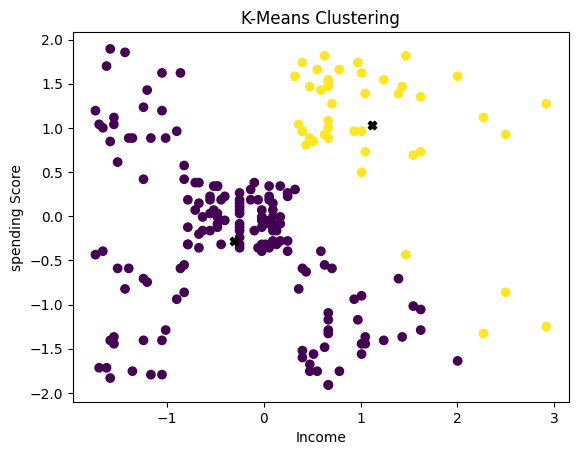

In [1]:
#06.Write a python program to implement clustering using k-means algorithm using an appropriate dataset.
import pandas as pd
data =pd.read_csv("/content/Mall_Customers (1).csv")
print(data.head())
# print(data.tail())

x = data[['Annual Income (k$)','Spending Score (1-100)']]

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_scaled=scalar.fit_transform(x)
print("Features scaled")

from sklearn.cluster import KMeans
inertia =[]
for k in range(1,11):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(x_scaled)
    inertia.append(model.inertia_)

kmeans=KMeans(n_clusters=2,random_state=42)
data['clusters']=kmeans.fit_predict(x_scaled)

centroids=scalar.inverse_transform(kmeans.cluster_centers_)
print("\n Centroids")
for i,c in enumerate(centroids):
    print(f"Cluster{i}:Income={c[0]},score={c[1]}")
print("\n Cluster counts")
print(data['clusters'].value_counts().sort_index())

import matplotlib.pyplot as plt
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=data['clusters'])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',marker='X')
plt.xlabel("Income")
plt.ylabel("spending Score")
plt.title("K-Means Clustering")
plt.show()